# Introduction: The Stroop Effect

For this project, we want to take a look at a dataset of people who have participated in a Stroop Effect Test. 

The Stroop Effect is the degree of difficulty people face when attempting to say the color of a word but the word itself displays the name of a different color. 

For example: Let's say someone was tasked with stating what the color of a group of words were. If each word was the name of the very color that they were printed in - i.e. the word 'Blue' is actually blue, the word 'Red' is printed in red, and so on - they will have virtually no issues saying the color.

However, if the words themselves displayed a name of a color that is not the color it was printed in - i.e. 'Blue' is in green, 'Red' is in purple - then participants will have a slight delay when attempting to say the name of the word's color. This phenomenon - the delay in reaction time when the words don't match the color - is the Stroop Effect.



## Congruent Example (matching between word and color)

In [2]:
from IPython.display import Image
Image(url='http://i.imgur.com/UrJP4BP.jpg')

## Incongruent Example (no match between word and color)

In [3]:
from IPython.display import Image
Image(url='http://i.imgur.com/HKc0num.jpg')

Named after John Ridley Stroop, Stroop's 1935 study had discovered participants took a significantly longer time to read the color's name when looking at the incongruent group compared to the congruent. We will test for this phenomenon ourselves with a dataset of test scores from a Stroop Effect test.

# Hypotheses and Statistical Test Selection

For this project, we'll be performing a **dependent t-test for paired samples**. 

The assumption we're making by using this test is that the distribution of the population is normal.

This is an appropriate test as we'll be comparing the means of two related groups. As this is a within-subject statistical test, the participants involved are being tested more than once - measuring their Stroop Test completion time first with the congruent group, and then next with the incongruent group. Additionally, we do not know the standard deviation of the population and have a sample size less than 30.

Our **independent variable** is the group type (congruent or incongruent), and the **dependent variable** is the Stroop Test completion time. 

**H0: MuC = MuI**

**HA: MuC =/= MuI**

The null hypothesis (H0) is the population mean for the congruent group completion times (MuC) will be approximately equal to the population mean for the incongruent group completion times (MuI). The alternative hypothesis (HA) is the population time for the congruent group completion times will be significantly different from the incongruent group completion times.

# Descriptive Statistics

We'll do some quick statistical analysis on the dataset of test scores to better understand our data.

In [5]:
import pandas as pd

In [6]:
stroop = pd.read_csv('stroopdata.csv')

Now that we've loaded the data into a DataFrame, let's use .head() to get a quick glimpse of the first top five rows.

In [7]:
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


So we have two columns. The columns are 'Congruent' and 'Incongruent' and contain the completion times for the test for each group. The completion times are measured in seconds. The row break down is by participant. 

Now we can use .describe on the data to see some statistical figures, including mean and standard deviation

In [9]:
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Here are quick takeaways from the output:

1. The mean for Congruent times is 14.05 seconds, while the mean for Incongruent is 22.02. 
2. Congruent times have a standard deviation of 3.56, and Incongruent times have a standard deviation of 4.80
3. Congruent times have a minimum of 8.63 seconds and a maximum of 22.33 seconds, while Incongruent times have a minimum of 15.69 seconds and a maximum of 35.26 seconds.

The mean, max, and min clearly illustrate slower completion times for participants when they attempt to read our the colors of the incongruent group of words. But is it significantly slower? We'll find out when we complete the statistical test.

# Visualizations

But before we move on to the statistical test, let's visualize the distribution of the completion times. I'll first import the seaborn package to spruce up the visualizations before creating the plots.

In [61]:
import seaborn as sns

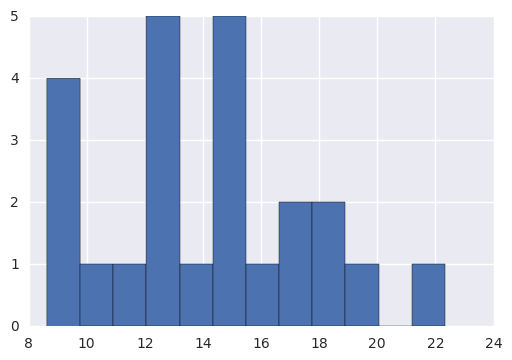

In [71]:
%matplotlib inline
stroop['Congruent'].hist(bins=12)

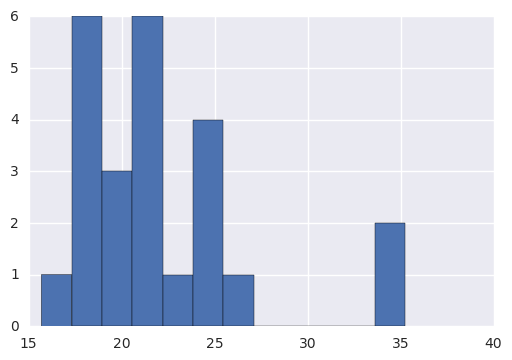

In [70]:
stroop['Incongruent'].hist(bins=12)

Distributions Observations:

1. The Incongruent distribution has the data distributed is less bins, meaning the completion times are close to one another in value. The Congruent distribution on the other hand is more spread out in comparison, with six bins having 1 value in them, in comparison to Incongruent's three bins.
2. The Incongruent distribution slowest times are much further behind than the second slowest times. It appears as an outlier in comparison to the rest of the dataset. This isn't seen in the Congruent data set, where the slowest time is only a couple seconds away from the second slowest times.

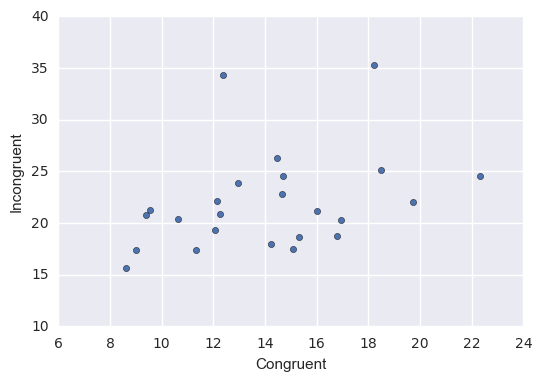

In [63]:
stroop.plot.scatter(x='Congruent', y='Incongruent')

Scatterplot observations:

1. Two outliers stand out immediately. In the middle of the datatset, we see there are two instances of participants whose Stroop test completion times for the incongruent group are much slower relative to the relative to the rest of the sample, with times hovering around ~35 seconds. 
2. There appears to be a weak positive correlation between completion times. 

It would be interesting to see the distribution of differences between the two test scores for the participants, to see what insights we could gather about to what extent their times slowed down when they were faced with the Incongruent group. Let's create a column that has the differences.

In [28]:
stroop['Difference'] = stroop['Incongruent'] - stroop['Congruent']

Let's just use .describe() on the column here so we can gather some insights on the differences.

In [32]:
stroop['Difference'].describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Difference, dtype: float64

Now we can create a distribution of the differences. 

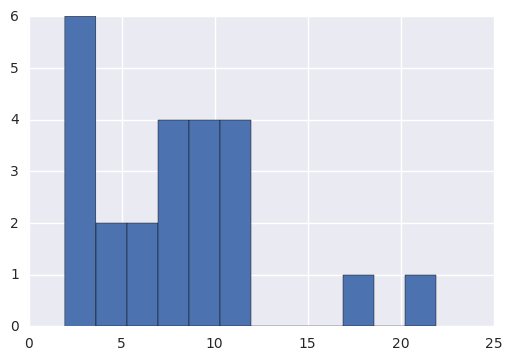

In [64]:
stroop['Difference'].hist(bins=12)

Difference Distribution Observation:

1. It appears most people saw their completion times go up by anywhere from ~3-12 seconds, as most of the distribution lies within this range.

2. As the Incongruent distribution and scatterplot illustrated, there are two values here that appear as outliers, with Incongruent completion times increasing as high as 21-22 seconds. 

# Statistical Test

Let us begin our statistical test. For reference, here is the hypotheses we set earlier:

Our null hypothesis will be that there will not be a significant difference between participants' times of reading out the colors with either group of words. 

Our alternative hypothesis is that there will be a significant difference between the completion times of each group. 

**H0: MuC = MuI**

**HA: MuC =/= MuI**

Please note that the "C" refers to the Congruent group completion times, and the I refers to the Incongruent group completion times.

First, let's outline the details of the test. This will be a **two-tailed test** with a **confidence level of 0.05**. The t-critical at that confidence level is **2.069.**

Let's calculate the mean completion times for the Congruent and Incongruent columns respectively and set them to variables.

In [33]:
CongruentMean = stroop['Congruent'].mean()
IncongruentMean = stroop['Incongruent'].mean()

In [38]:
print("The mean participants' Stroop test completion time for the Congruent group is", CongruentMean)
print("The mean participants' Stroop test completion time for the Incongruent group is", IncongruentMean)

The mean participants' Stroop test completion time for the Congruent group is 14.051125000000004
The mean participants' Stroop test completion time for the Incongruent group is 22.01591666666667


Now let's calculate the point estimate for the difference in completion times.

In [41]:
DifferenceMean = IncongruentMean - CongruentMean

In [42]:
print("Our point estimate is", DifferenceMean)

Our point estimate is 7.964791666666665


Up next, we'll need to calculate the Sample Standard Deviation of the differences in completion times between the Congruent group and the Incongruent group.

In [43]:
DifferenceSD = stroop['Difference'].std()

In [44]:
print("Our sample standard deviation is", DifferenceSD)

Our sample standard deviation is 4.864826910359056


Now we'll need to calculate the Standard Error, as we'll need the value in order to calculate the t-Statistic afterwards.

We need the sample size first. Let's use .count() on a column in stroop to find the sample size.

In [55]:
samplesize = stroop['Congruent'].count() #24 is the sample size

In [56]:
print("The sample size is", samplesize)

The sample size is 24


Since we'll need to take the square root of the sample size in order to calculate the Standard Error, we'll need to import math so we can use the math.sqrt() function.

In [47]:
import math

Now we have what we need to calculate the Standard Error.

In [57]:
StandardError = DifferenceSD/math.sqrt(samplesize)

In [58]:
print("The Standard Error is", StandardError)

The Standard Error is 0.9930286347783406


Great! Now we have everything we need to calculate the t-statistic. 

In [59]:
tstat = DifferenceMean/StandardError

In [60]:
print("Our t-statistic is", tstat)

Our t-statistic is 8.020706944109955


At a confidence level of 0.05 and a t-critical of 2.069, a t-statistic of 8.02 indicates there is a significant difference in completion times of the Stroop Test between the two groups. Thus, we reject the null hypothesis in favor of the alternative. 

# Conclusion

We can conclude that the time it takes for a participant to name the colors of a group of words will be significantly increased if the words themselves are spelling out the name of a different color entirely. This is consistent with the scientific findings of the Stroop Effect phenomenon. 

As for why this is the case, studies point towards the difference in the brain's cognitive effort between reading and declaring a color. Reading is more effortless of a task due to how frequent reading is in peoples' lives, but declaring a color requires more effort. The moment the two tasks come into conflict, as they do for participants when being tested with the incongruent group, then the task of declaring the color takes even longer as the brain has to resolve the conflicted information (color of the word not matching what the word actually says).

There are alternative test examples that could also convey the Stroop Effect phenomenon. You can throw in shapes into the color and word mix to add another layer of difficulty.

In [4]:
from IPython.display import Image
Image(url='http://i.imgur.com/Yd4YbCH.png')

The above is how the incongruent group would look like if shapes were involved as well. For example, the first object is what clearly appears to be a red circle. But the words attached say "Blue square." The participant would have to deal with a similar conflict from the test before, but also take into account that the text is telling them it's a different shape than what it actually is. 

----------------------------------------------------------------------------------------------------

Sources:

1. http://www.psytoolkit.org/lessons/stroop.html
2. http://psychclassics.yorku.ca/Stroop/
3. https://imotions.com/blog/the-stroop-effect/
4. http://learn.genetics.utah.edu/content/memory/demos/images/strooptest.jpg
5. https://s-media-cache-ak0.pinimg.com/originals/21/9d/f5/219df5c1f412a2aa79ec5d67a0b21943.gif